In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier transformation: simplest case
Consider an observation which is a time average over $\tau$.  
$$T^{\rm obs}(\vec\theta) = \frac1\tau\,\int dt T(\vec\theta,t)$$
But a given parcel of air is moving so that $T(\vec\theta,t)=T_0(\vec\theta-\frac{\int_0^t dt' \vec v(t')}{h})$ where $T_0(\vec\theta)$ is the initial temperature pattern. As an example, in the case of constant velocity, the temperature at the origin at time $t$ is equal to $T_0$ at the pixel $-vt$. So,
$$T^{\rm obs}(\vec\theta) = \frac1\tau\,\int dt T_0(\vec\theta-d\vec\theta(t))$$
where $d\vec\theta(t)\equiv \frac{\int_0^t dt' \vec v(t')}{h}$.

Take the Fourier transform:
$$\tilde T^{\rm obs}(\vec l) = \int d^2\theta e^{-i\vec l\cdot\vec \theta} \frac1\tau\,\int dt T_0(\vec\theta-d\vec\theta(t)) $$
Define a new dummy variable $\vec\theta'\equiv \vec\theta - d\vec\theta$. Then, 
$$\tilde T^{\rm obs}(\vec l) = \int d^2\theta' \frac1\tau\,\int dt e^{-i\vec l\cdot[\vec\theta'+d\vec\theta(t)]} T_0(\vec\theta') $$
Now,
$$d\vec\theta = \frac1h\int_0^t dt' \left[ \hat x w\cos(2\pi t'/T_c) + \hat y w\sin(2\pi t'/T_c) \right]$$
where $w$ is the constant wind speed (taken for convience to be in the $x$-direction and $T$ is the Coriolis rotation time, $T=43,200/sin\phi$ s.
So,
$$d\vec\theta = \frac{T_cw}{2\pi h} \left[ \hat\theta_x \sin(2\pi t/T_c) - \hat\theta_y [1 - \cos(2\pi t/T_c)] \right].$$
Since the exposure time is much smaller than $T_c$, this reduces to
$$d\vec\theta = \frac{wt}h \left[ \hat\theta_x  + \hat\theta_y \left(\frac{2\pi t}{T_c}\right)\right].$$

Therefore,
$$\tilde T^{\rm obs}(\vec l) = \int d^2\theta \frac1\tau\,\int dt e^{-i\vec l\cdot[\vec\theta+(wt/h) \left[ \hat\theta_x  + \hat\theta_y \left(\frac{2\pi t}{T_c}\right)\right]]} T_0(\vec\theta) .$$
Since the motion is independent of position, this integral factors into the product:
$$
\tilde T^{\rm obs}(\vec l) = \tilde T_0(\vec l) \tilde Q(\vec l)
$$
with
$$ \tilde Q(\vec l) \equiv \frac1\tau\,\int dt e^{-i(wt/h) \vec l\cdot[\left[ \hat\theta_x  + \hat\theta_y \left(\frac{2\pi t}{T_c}\right)\right]]}  .$$
If we expand the coriolis term, then $\tilde Q$ is the sum of 2 terms:
$$
\tilde Q_0(\vec l) = \sinc(wtl_x/h) $$
and
$$
\tilde Q_1(\vec l) = \frac{-i2\pi wl_y}{hT_c}\frac1\tau\,\int dt \,t^2\,e^{-i(wt/h) l_x} .$$
Defining $\beta\equiv w\taul_x/2h$ leads to
$$
\tilde Q_1(\vec l) = \frac{-i\pi l_y\tau}{2l_xT_c}\,I(\beta)$$
with 
$$I(\beta) \equiv \frac1{\beta^2}\,\int_{-\beta}^\beta dx\,x^2 e^{-ix}.$$



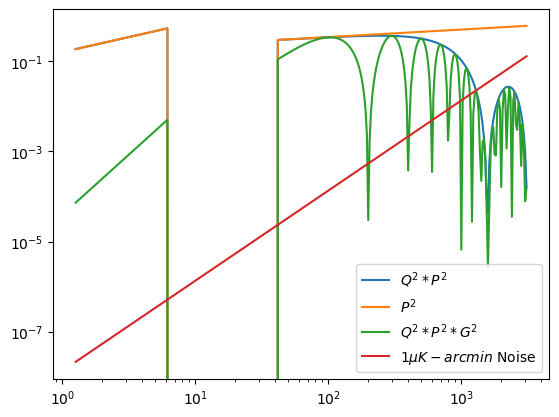

In [5]:
h=1.e3
deltah=100.
a=1. # Ah^5/3\sim 1 mK**2


    
x=np.arange(.1,3.5,.01)
larr=10.**x
parr=np.zeros(np.size(larr))
for i,l in enumerate(larr):
    alpha=l/(2*3.14)
    alpham=h*.5/deltah
 #   if alpha <= alphai:
    if alpha >= (alpham*1.3):
        parr[i]=a/l**(11./6.)
    else:
        if alpha <= (alpham/5.):
            parr[i]=a/l**(8./6.)

def P(l):
    tmp = np.interp(l, larr, parr) 
    return tmp

pfin=[]
for l in larr:
    pfin.append(P(l))
pfin=np.array(pfin)

w=10
t=.2
h=1.e3
y=w*t*larr/h
q0=np.sin(y)/y
amp=pfin*larr**2/(2.*3.14)
plt.plot(larr,amp*q0**2,label='$Q^2*P^2$')
plt.plot(larr,amp,label='$P^2$')
plt.yscale('log')
plt.xscale('log')
thetachop=.01
g=np.sin(3.14*larr*thetachop/2)
plt.plot(larr,amp*q0**2*g**2,label='$Q^2*P^2*G^2$')

## Noise
## C_l = \Delta_T^2*\Omega_pixel =(3\mu K)^2 \arcmin^2
arcmin=np.pi/180/60
cnoise = (1*arcmin)**2 #3\mu K^2 with 1' pixels
plt.plot(larr,cnoise*larr**2/(2.*3.14),label='$1 \mu K-arcmin$ Noise')

plt.legend()


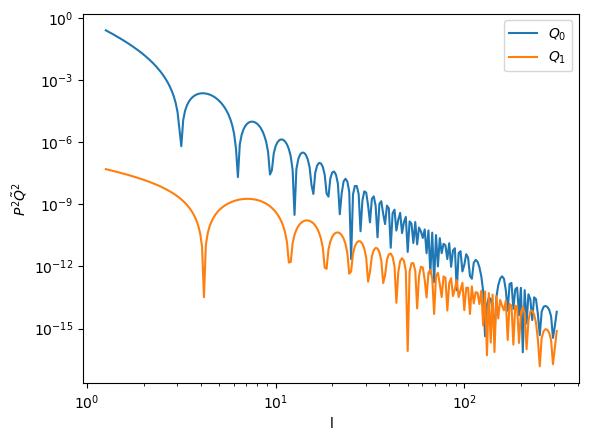

In [6]:
x=np.arange(.1,2.5,.01)
l=10.**x
w=10
t=100
h=1.e3
y=w*t*l/h
q0=np.sin(y)/y
plt.plot(l,q0**2/l**(11./3),label='$Q_0$')

## Q_1; see below
beta = w*t*l*.5/h
q1=np.sin(beta)*(.5-1/beta**2)+np.cos(beta)/beta
eps=3.14*t/(2*4.3e4)
plt.plot(l,eps**2*q1**2/l**(11./3),label='$Q_1$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('l')
plt.ylabel('$P^2 \\tilde Q^2$')
plt.legend()
#plt.axis([1,1000,.1,100])

Now rewrite $Q_1$ by defining a dummy variable $x\equiv wtl_x/h$. Then, the limits becomes $\pm w\tau l_x/2h$ and there is a prefactor $[h/(wl_x)]^3$, so 
$$
\tilde Q_1(\vec l) = \frac{-i\pi l_y\tau}{2l_xT_c}\frac1{\beta^2}\,\int_{-\beta}^\beta dx \,x^2\,e^{-ix} $$
where $\beta\equiv w\tau l_x/2h$.
The claim is that the integral is
$$\sin(\beta)\left(\frac12-\frac1{\beta^2}\right)+\cos(\beta)/\beta. $$

# Frozen Atmosphere Approximation
Consider an observation which is a time average over $\tau$.  
$$T^{\rm obs}(\vec\theta) = \frac1\tau\,\int dt T(\vec\theta,t)$$
But the telescope is scanning with frequency $\omega$ so a given horn records $T(\vec\theta,t)=T_0(\vec\theta+\vec\omega t)$
where
$T_0(\vec\theta)$ is the initial temperature pattern. So,
$$T^{\rm obs}(\vec\theta) = \frac1\tau\,\int dt T_0(\vec\theta+\vec\omega t)$$


Take the Fourier transform:
$$\tilde T^{\rm obs}(\vec l) = \int d^2\theta e^{-i\vec l\cdot\vec \theta} \frac1\tau\,\int dt T_0(\vec\theta+\vec\omega t) $$
Define a new dummy variable $\vec\theta'\equiv \vec\theta +\vec\omega t$. Then, 
$$\tilde T^{\rm obs}(\vec l) = \int d^2\theta' \frac1\tau\,\int dt e^{-i\vec l\cdot[\vec\theta'-\vec\omega t']} T_0(\vec\theta') $$
This reduces to 
$$\tilde T^{\rm obs}(\vec l) = \tilde T_0(\vec l) \tilde G(\vec l)$$
where now 
$$\tilde G(\vec l) \equiv \frac1\tau\,\int dt e^{i\vec l\cdot\vec\omega t'} = \frac{\sin(l_x\omega \tau)}{l_x\omega\tau}.$$


0.017453292519943295


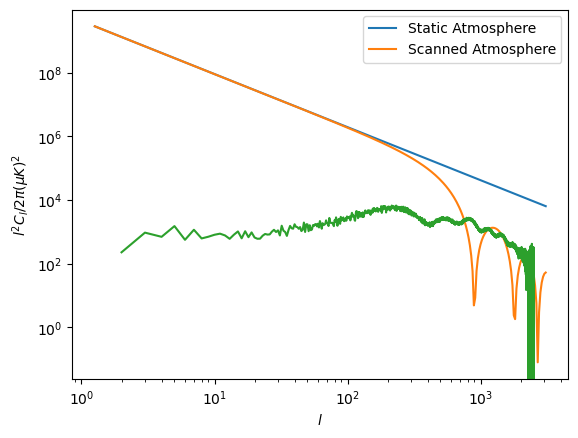

In [19]:
## Plot this for both the CMB and for the atmosphere.
deg=np.pi/180
omega=100*deg/100 # 100 degrees back and forth in 100 seconds
print(omega)
tau=.2
a=31.e6 # Ah^5/3\sim 31 \mu K**2 per Tom crawford slack, 

x=np.arange(.1,3.5,.01)
larr=10.**x


parr=np.zeros(np.size(larr))

def lop(l):
    return (a/(l/2/3.14)**(8./3.))  ## the 2\pi)^2 since it goes as \alpha^p = (l/2\pi)^p
def hip(l):
    return (a/(l/2/3.14)**(11./3.))
# Fill values for x < x1
x1=alpham/(2*3.14*5.)
x2=1.2*alpham/(2*3.14)
himask=larr>x2
#print(himask)
parr[larr < x1] = lop(larr[larr < x1])
parr[himask] = hip(larr[himask])
#parr[larr > x2] = hip(larr[larr < x2])

# Interpolate for x1 <= x <= x2
interpolation_mask = (larr >= x1) & (larr <= x2)
x_interp = larr[interpolation_mask]

y1 = lop(x1)
y2 = hip(x2)
parr[interpolation_mask] = np.interp(x_interp, [x1, x2], [y1, y2])




amp=parr*larr**2/(2.*3.14)

#plt.plot(larr,amp*q0**2,label='$Q^2*P^2$')
plt.plot(larr,amp,label='Static Atmosphere')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$l$')
plt.ylabel('$l^2C_l/2\pi (\mu K)^2$')
q0=np.sin(larr*omega*tau)/(larr*omega*tau)
plt.plot(larr,amp*q0**2,label='Scanned Atmosphere')

cmbl=np.loadtxt('planck.txt').T[0]
cmbd=np.loadtxt('planck.txt').T[1]
plt.plot(cmbl,cmbd)

plt.legend()


In [24]:
import random


0.7347164022836747


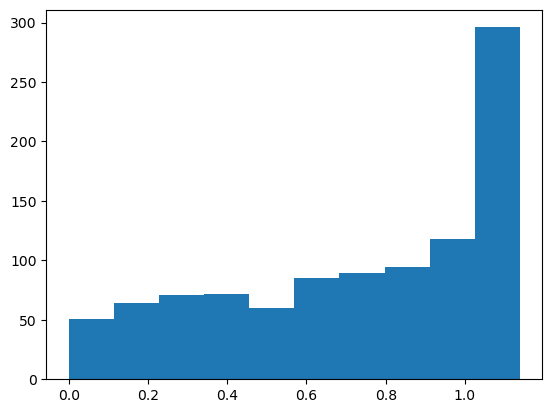

In [44]:
deltah=100.
h=1.e3
windspeed=10.
nucmb=omega*larr
vx=np.random.normal(0.,np.sqrt(windspeed))
vy=np.random.normal(0.,np.sqrt(windspeed))
nucoeff=[]
for i in range(1000):
    theta=random.uniform(0,np.pi)
    nucoeff.append(np.abs((np.cos(theta)*(omega-vx/h)-(np.sin(theta))*vy/h))/omega)
plt.hist(nucoeff)
nucoeff=np.array(nucoeff)
print(np.mean(nucoeff))



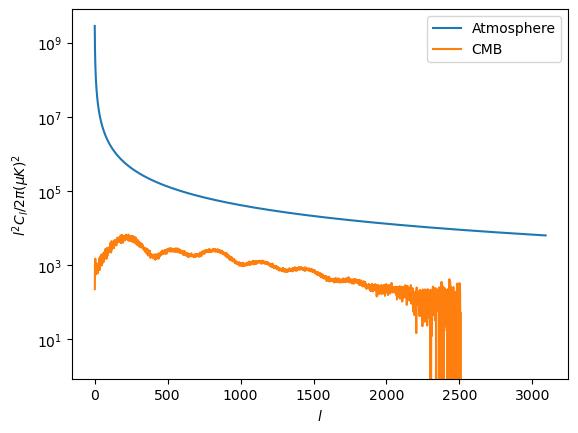

In [43]:
plt.plot(larr,amp,label='Atmosphere')
plt.plot(cmbl,cmbd,label='CMB')
plt.yscale('log')
plt.ylabel('$l^2C_l/2\pi (\mu K)^2$')
plt.xlabel('$l$')
plt.yscale('log')
#plt.xscale('log')

plt.legend()
plt.savefig('lf.png')

In [17]:
print(np.sum(amp))

2881475.9490747945
